<img align="left" src="../img/notebook_banner_siegel.png" style="width:1100px;">

## <b> Tackle data formats <b>

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

### <b> Binary data <b>

Data from [Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS Passive Microwave Data](http://nsidc.org/data/nsidc-0051.html). 

In [61]:
!wget ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_202012_f17_v1.1_n.bin

--2021-05-12 13:43:11--  ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_202012_f17_v1.1_n.bin
           => ‘nt_202012_f17_v1.1_n.bin’
Resolving sidads.colorado.edu (sidads.colorado.edu)... 128.138.135.20
Connecting to sidads.colorado.edu (sidads.colorado.edu)|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly ... done.
==> SIZE nt_202012_f17_v1.1_n.bin ... 136492
==> PASV ... done.    ==> RETR nt_202012_f17_v1.1_n.bin ... done.
Length: 136492 (133K) (unauthoritative)

nt_202012_f17_v1.1_ 100%[===================>] 133,29K   176KB/s    in 0,8s    

2021-05-12 13:43:14 (176 KB/s) - ‘nt_202012_f17_v1.1_n.bin’ saved [136492]



Create file id:

In [70]:
ice = np.fromfile('nt_202012_f17_v1.1_n.bin', dtype='uint8')

We use *uint8* data type. 
[List of numpy data types](https://numpy.org/doc/stable/user/basics.types.html)

The file format consists of a 300-byte descriptive header followed by a two-dimensional array.

In [71]:
ice

array([48, 48, 50, ...,  0,  0,  0], dtype=uint8)

In [72]:
ice = ice[300:]

Reshape

In [73]:
ice = ice.reshape(448,304)

Simple visualisation of array with imshow (Matplotlib function):

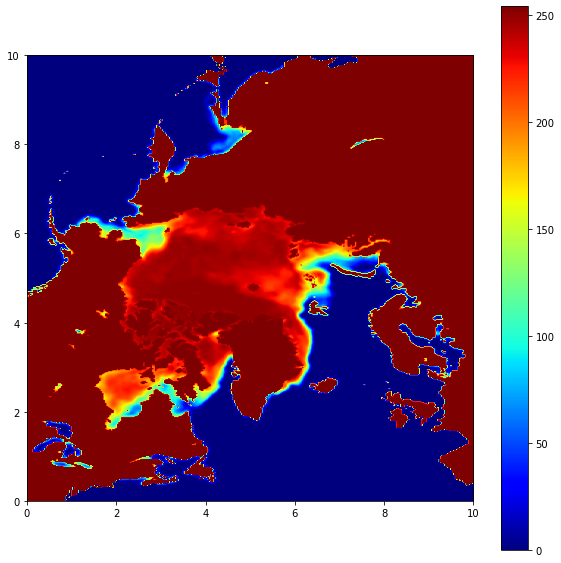

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(ice,extent=(0,10,0,10),cmap='jet')
plt.colorbar()

To convert to the fractional parameter range of 0.0 to 1.0, divide the scaled data in the file by 250. If you prefer percent, divide by 2.5.

In [ ]:
ice = ice/250

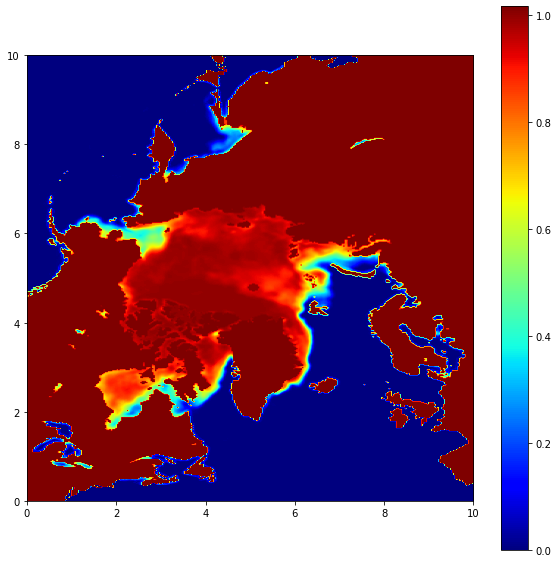

In [77]:
plt.figure(figsize=(10,10))
plt.imshow(ice,extent=(0,10,0,10),cmap='jet')
plt.colorbar()

You can mask all land or missing values:

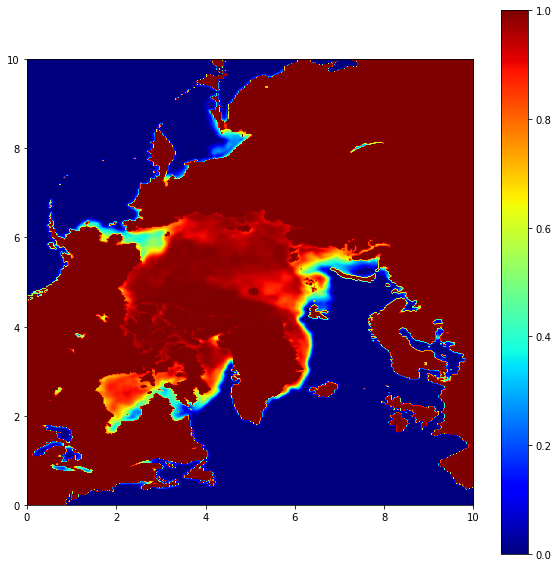

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(ice,extent=(0,10,0,10),vmin=0, vmax=1.0,cmap='jet')
plt.colorbar()


In [ ]:
ice_masked = np.ma.masked_greater(ice, 1.0)


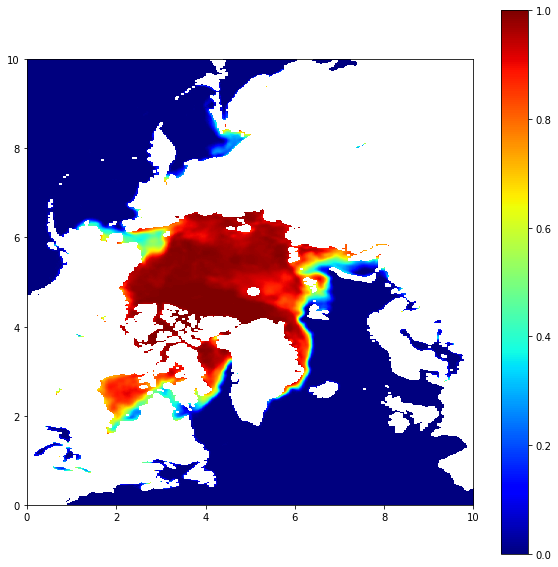

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(ice_masked,extent=(0,10,0,10),vmin=0, vmax=1.0,cmap='jet')
plt.colorbar()

Masking in this case is similar to using *NaN* in Matlab. [More about NumPy masked arrays](https://numpy.org/doc/stable/reference/maskedarray.html)

#### <b> Save binary file, if wanted <b>

In [85]:
fid = open('My_ice_2007.bin', 'wb')
ice.tofile(fid)
fid.close()

In order to work with other data formats we need to use one of the SciPy submodules:

### <b> SciPy <b>

General purpose scientific library (that consist of bunch of sublibraries) and builds on NumPy arrays.

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

We only use:

#### <b> scipy.io <b>

to open .mat files

In [88]:
from scipy.io import loadmat

We are going to use a matlab file [Polar science center Hydrographic Climatology (PHC)](http://psc.apl.washington.edu/nonwp_projects/PHC/Climatology.html).

In [91]:
#!wget https://www.dropbox.com/s/0kuzvz03gw6d393/PHC_jan.mat

--2021-05-12 14:58:23--  https://www.dropbox.com/s/0kuzvz03gw6d393/PHC_jan.mat
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6022:18::a27d:4212, 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6022:18::a27d:4212|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0kuzvz03gw6d393/PHC_jan.mat [following]
--2021-05-12 14:58:26--  https://www.dropbox.com/s/raw/0kuzvz03gw6d393/PHC_jan.mat
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0cd569c1c9c75655770d0cea47.dl.dropboxusercontent.com/cd/0/inline/BOV6D50Idg5KqWD6cYnyX2cgqGTq_LVH1p7YVULtYdjSC3B_PdySfiZeVzt068eLdKCk59TWc8yUDKNnhrZANitu2W7NH667ZZCoDHGBaQrRKIMoqOvhCxLthsueJzefXQJg3A7a9y6uc4t2OggoSOkf/file# [following]
--2021-05-12 14:58:26--  https://uc0cd569c1c9c75655770d0cea47.dl.dropboxusercontent.com/cd/0/inline/BOV6D50Idg5KqWD6cYnyX2cgqGTq_LVH1p7YVULtYdjSC3B_PdySfiZeVzt068eLdKCk59TWc8

Open file:

In [97]:
all_variables = loadmat('PHC_jan.mat')

We can look at the names of variables stored in the file:

In [98]:
all_variables.keys()

dict_keys(['__header__', '__version__', '__globals__', 'LAT', 'LON', 'DEPTH', 'PTEMP1'])

We need only *PTEMP1* (3d potential temperature).

In [101]:
temp = all_variables['PTEMP1']

Check variable's shape:

In [104]:
temp.shape

(33, 180, 360)

Show surface level:

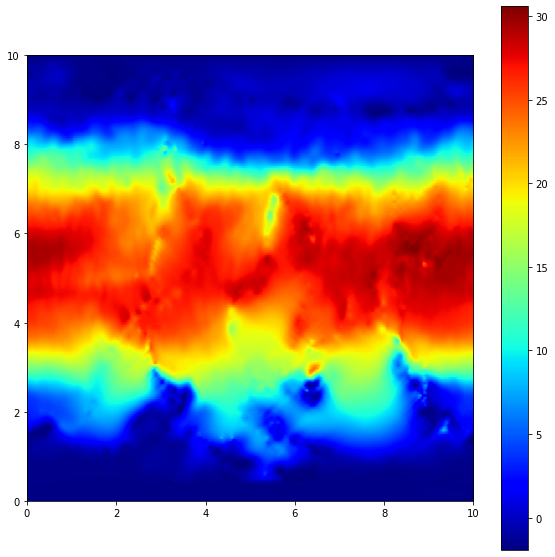

In [110]:
plt.figure(figsize=(10,10))
plt.imshow(temp[0,:,:],extent=(0,10,0,10),cmap='jet')
plt.colorbar()

#### <b> Open netCDF files <b>

Scipy have function for working with netCDF files, but please don't use it it's absolete (e.g. do not support netCDF4).

The best basic option is to use [python netcdf4](https://github.com/Unidata/netcdf4-python) module that have a lot of nice functionality. Moreover NCEP reanalysis data, that we are going to work with are in netCDF4 format.

Later in the course we will also have a look at [xarray](http://xarray.pydata.org/en/stable/) that is the most convinient option nowadays. 

Import nessesary function:

In [112]:
from netCDF4 import Dataset

I am going to download [NCEP reanalysis data](http://www.esrl.noaa.gov/psd/data/reanalysis/reanalysis.shtml). Surface 4 daily air temperature for 2012.

In [118]:
# !wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.2016.nc
!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.1948.nc

--2021-05-12 16:11:54--  ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.1948.nc
           => ‘air.2m.gauss.1948.nc’
Resolving ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)... 140.172.38.117
Connecting to ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/ncep.reanalysis.dailyavgs/surface_gauss ... done.
==> SIZE air.2m.gauss.1948.nc ... 12586315
==> PASV ... done.    ==> RETR air.2m.gauss.1948.nc ... done.
Length: 12586315 (12M) (unauthoritative)

air.2m.gauss.1948.n 100%[===================>]  12,00M  1,63MB/s    in 8,2s    

2021-05-12 16:12:04 (1,46 MB/s) - ‘air.2m.gauss.1948.nc’ saved [12586315]



Create file id:

In [120]:
fnc = Dataset('air.2m.gauss.1948.nc')

It's not really file id, it's *netcdf_file* object, that have some methods and attributes:

In [121]:
fnc.description

'Data is from NMC initialized reanalysis\n(4x/day).  It consists of T62 variables interpolated to\npressure surfaces from model (sigma) surfaces.'

In [122]:
fnc.history

'created 99/05/17 by Hoop (netCDF2.3)\nConverted to chunked, deflated non-packed NetCDF4 2014/09'

list variables

In [123]:
fnc.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     actual_range: [ 88.542 -88.542]
     long_name: Latitude
     standard_name: latitude
     axis: Y
 unlimited dimensions: 
 current shape = (94,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: Longitude
     actual_range: [  0.    358.125]
     standard_name: longitude
     axis: X
 unlimited dimensions: 
 current shape = (192,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: Time
     delta_t: 0000-00-01 00:00:00
     avg_period: 0000-00-01 00:00:00
     standard_name: time
     axis: T
     units: hours since 1800-01-01 00:00:0.0
     actual_range: [1297320. 1306080.]
 unlimited dimensions: time
 current shape = (366,)
 filling on, default _FillValue of 9.969209968386869e+36 used,


Access information about variables

In [124]:
air = fnc.variables['air']

This time we create *netcdf_variable* object, that contain among other things attributes of the netCDF variable as well as data themselves. 

In [125]:
air.actual_range

array([172.82   , 315.16998], dtype=float32)

In [126]:
air.long_name

'mean Daily Air temperature at 2 m'

In [127]:
air.units

'degK'

In [128]:
air.shape

(366, 94, 192)

We can access the data by simply using array syntax. Here we show first time step of our data set:

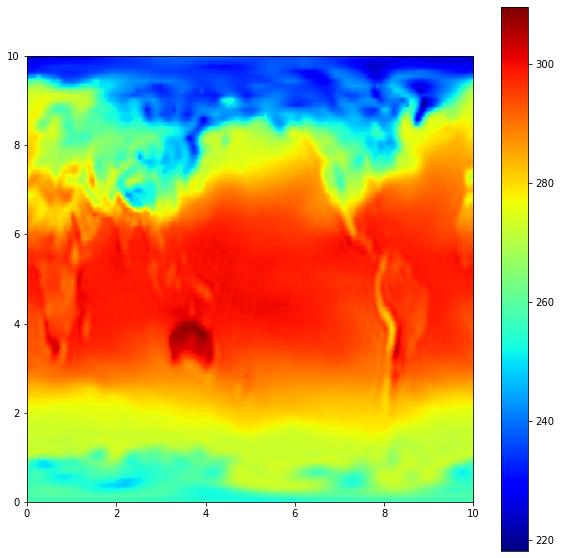

In [130]:
plt.figure(figsize=(10,10))
plt.imshow(air[0,:,:],extent=(0,10,0,10),cmap='jet')
plt.colorbar()


#plt.imshow(air[0,:,:])
#plt.colorbar();

#### <b> Save netCDF file <b>

In [132]:
#!rm test_netcdf.nc
fw = Dataset('test_netcdf.nc', 'w')

fw.createDimension('t', 366)
fw.createDimension('y', 94)
fw.createDimension('x', 192)

air_var = fw.createVariable( 'air','float32', ('t', 'y', 'x'))
air_var[:] = air[:]
fw.close()

More descriptive variant:

In [133]:
!rm test_netcdf.nc
fw = Dataset('test_netcdf.nc', 'w')

fw.createDimension('TIME', 366)
fw.createDimension('LATITUDE', 94)
fw.createDimension('LONGITUDE', 192)

time = fw.createVariable('TIME', 'f', ('TIME',))
time[:] = fnc.variables['time'][:]
time.units = 'hours since 1-1-1 00:00:0.0' 

lat  = fw.createVariable('LATITUDE', 'f', ('LATITUDE',))
lat[:] = fnc.variables['lat'][:]

lon = fw.createVariable('LONGITUDE', 'f', ('LONGITUDE',))
lon[:] = fnc.variables['lon'][:]

ha = fw.createVariable('New_air','f', ('TIME', 'LATITUDE', 'LONGITUDE'))
ha[:] = air[:]
ha.missing_value = -9999.

fw.close()

## Links

* [PyNio - library that reads NetCDF, GRIB, HDF and so on ... ](http://www.pyngl.ucar.edu/Nio.shtml)
* [netCDF4 - advanced netCDF module](https://unidata.github.io/netcdf4-python/netCDF4/index.html)
* [Scipy cookbook](http://wiki.scipy.org/Cookbook)